##Welcome to my NYC Airbnb EDA project - my second EDA project.##

We will validate the data to make sure the .csv file is appropriate to work with, and if not then we will clean the data and handle the issues that we might run into with Pandas.

After the validation we analyze the data for any underlying trends and interesting metrics that we want to investigate, and I will present these findings visually through: Matplotlib, Seaborn, and Tableau

In [10]:
import pandas as pd

# Here is where we will investigate and validate the data for completeness and correctness.
# I already did some initial exploration in Data Wrangler to see which columns had null values that needed to be replaced/filled.

filepath = '/Users/andrewhlavacek/Documents/EDA_NYCAirbnb/AB_NYC_2019.csv'
df = pd.read_csv(filepath)

# Let's see what a row of the .csv looks like
print(df.head(1))

# Check for null values and fill 16 null values
print(df['name'].isnull().sum())
df['name'] = df['name'].fillna('Unknown')

# Check for null values and fill 21 null values
print(df['host_name'].isnull().sum())
df['host_name'] = df['host_name'].fillna('Unknown')

# Save the updated .csv for later work
df.to_csv('/Users/andrewhlavacek/Documents/EDA_NYCAirbnb/AB_NYC_2019.csv', index=False)




     id                                name  host_id host_name  \
0  2539  Clean & quiet apt home by the park     2787      John   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0            Brooklyn    Kensington  40.64749  -73.97237  Private room    149   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               1                  9  2018-10-19               0.21   

   calculated_host_listings_count  availability_365  
0                               6               365  
16
21


Now that we've cleaned the data we can move onto analyzing and visualizing the data so that we can tell a story about Airbnbs in New York

We are going to break down our analysis and visualzation into three categories:

Beginner:

    1.	Which neighborhood group has the most Airbnb listings?
	2.	What is the average price of an Airbnb listing in each borough?
	3.	What is the distribution of room types across NYC?
	4.	Which 5 neighborhoods have the highest average price?
	5.	How many listings are available for at least 300 days a year?

Intermediate:

    1.	Is there a correlation between number of reviews and price?
	2.	What is the average price of listings based on room type and neighborhood group?
	3.	Which hosts have the most listings, and how much do they charge on average?
	4.	How does availability vary by borough across different room types?
	5.	What are the most reviewed listings in Manhattan and their price ranges?

Hard:

	1.	Can we identify clusters of high-priced listings using latitude and longitude (e.g., via KMeans)?
	2.	What is the price elasticity across room types and minimum night stays (does price predict duration)?
	3.	Is there a statistically significant price difference between boroughs (e.g., ANOVA)?
	4.	Can we build a model to predict listing price using features like room type, location, and availability?
	5.	How do availability and number of reviews impact price — controlling for neighborhood and room type (multivariate regression)?

Throughout my analysis I will answer these questions and will be able to compare the results with tableau as well.

/var/folders/xz/p2ff3pyj7ld80r8bfv3x3lk40000gn/T/ipykernel_21164/3714363476.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/xz/p2ff3pyj7ld80r8bfv3x3lk40000gn/T/ipykernel_21164/3714363476.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/xz/p2ff3pyj7ld80r8bfv3x3lk40000gn/T/ipykernel_21164/3714363476.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


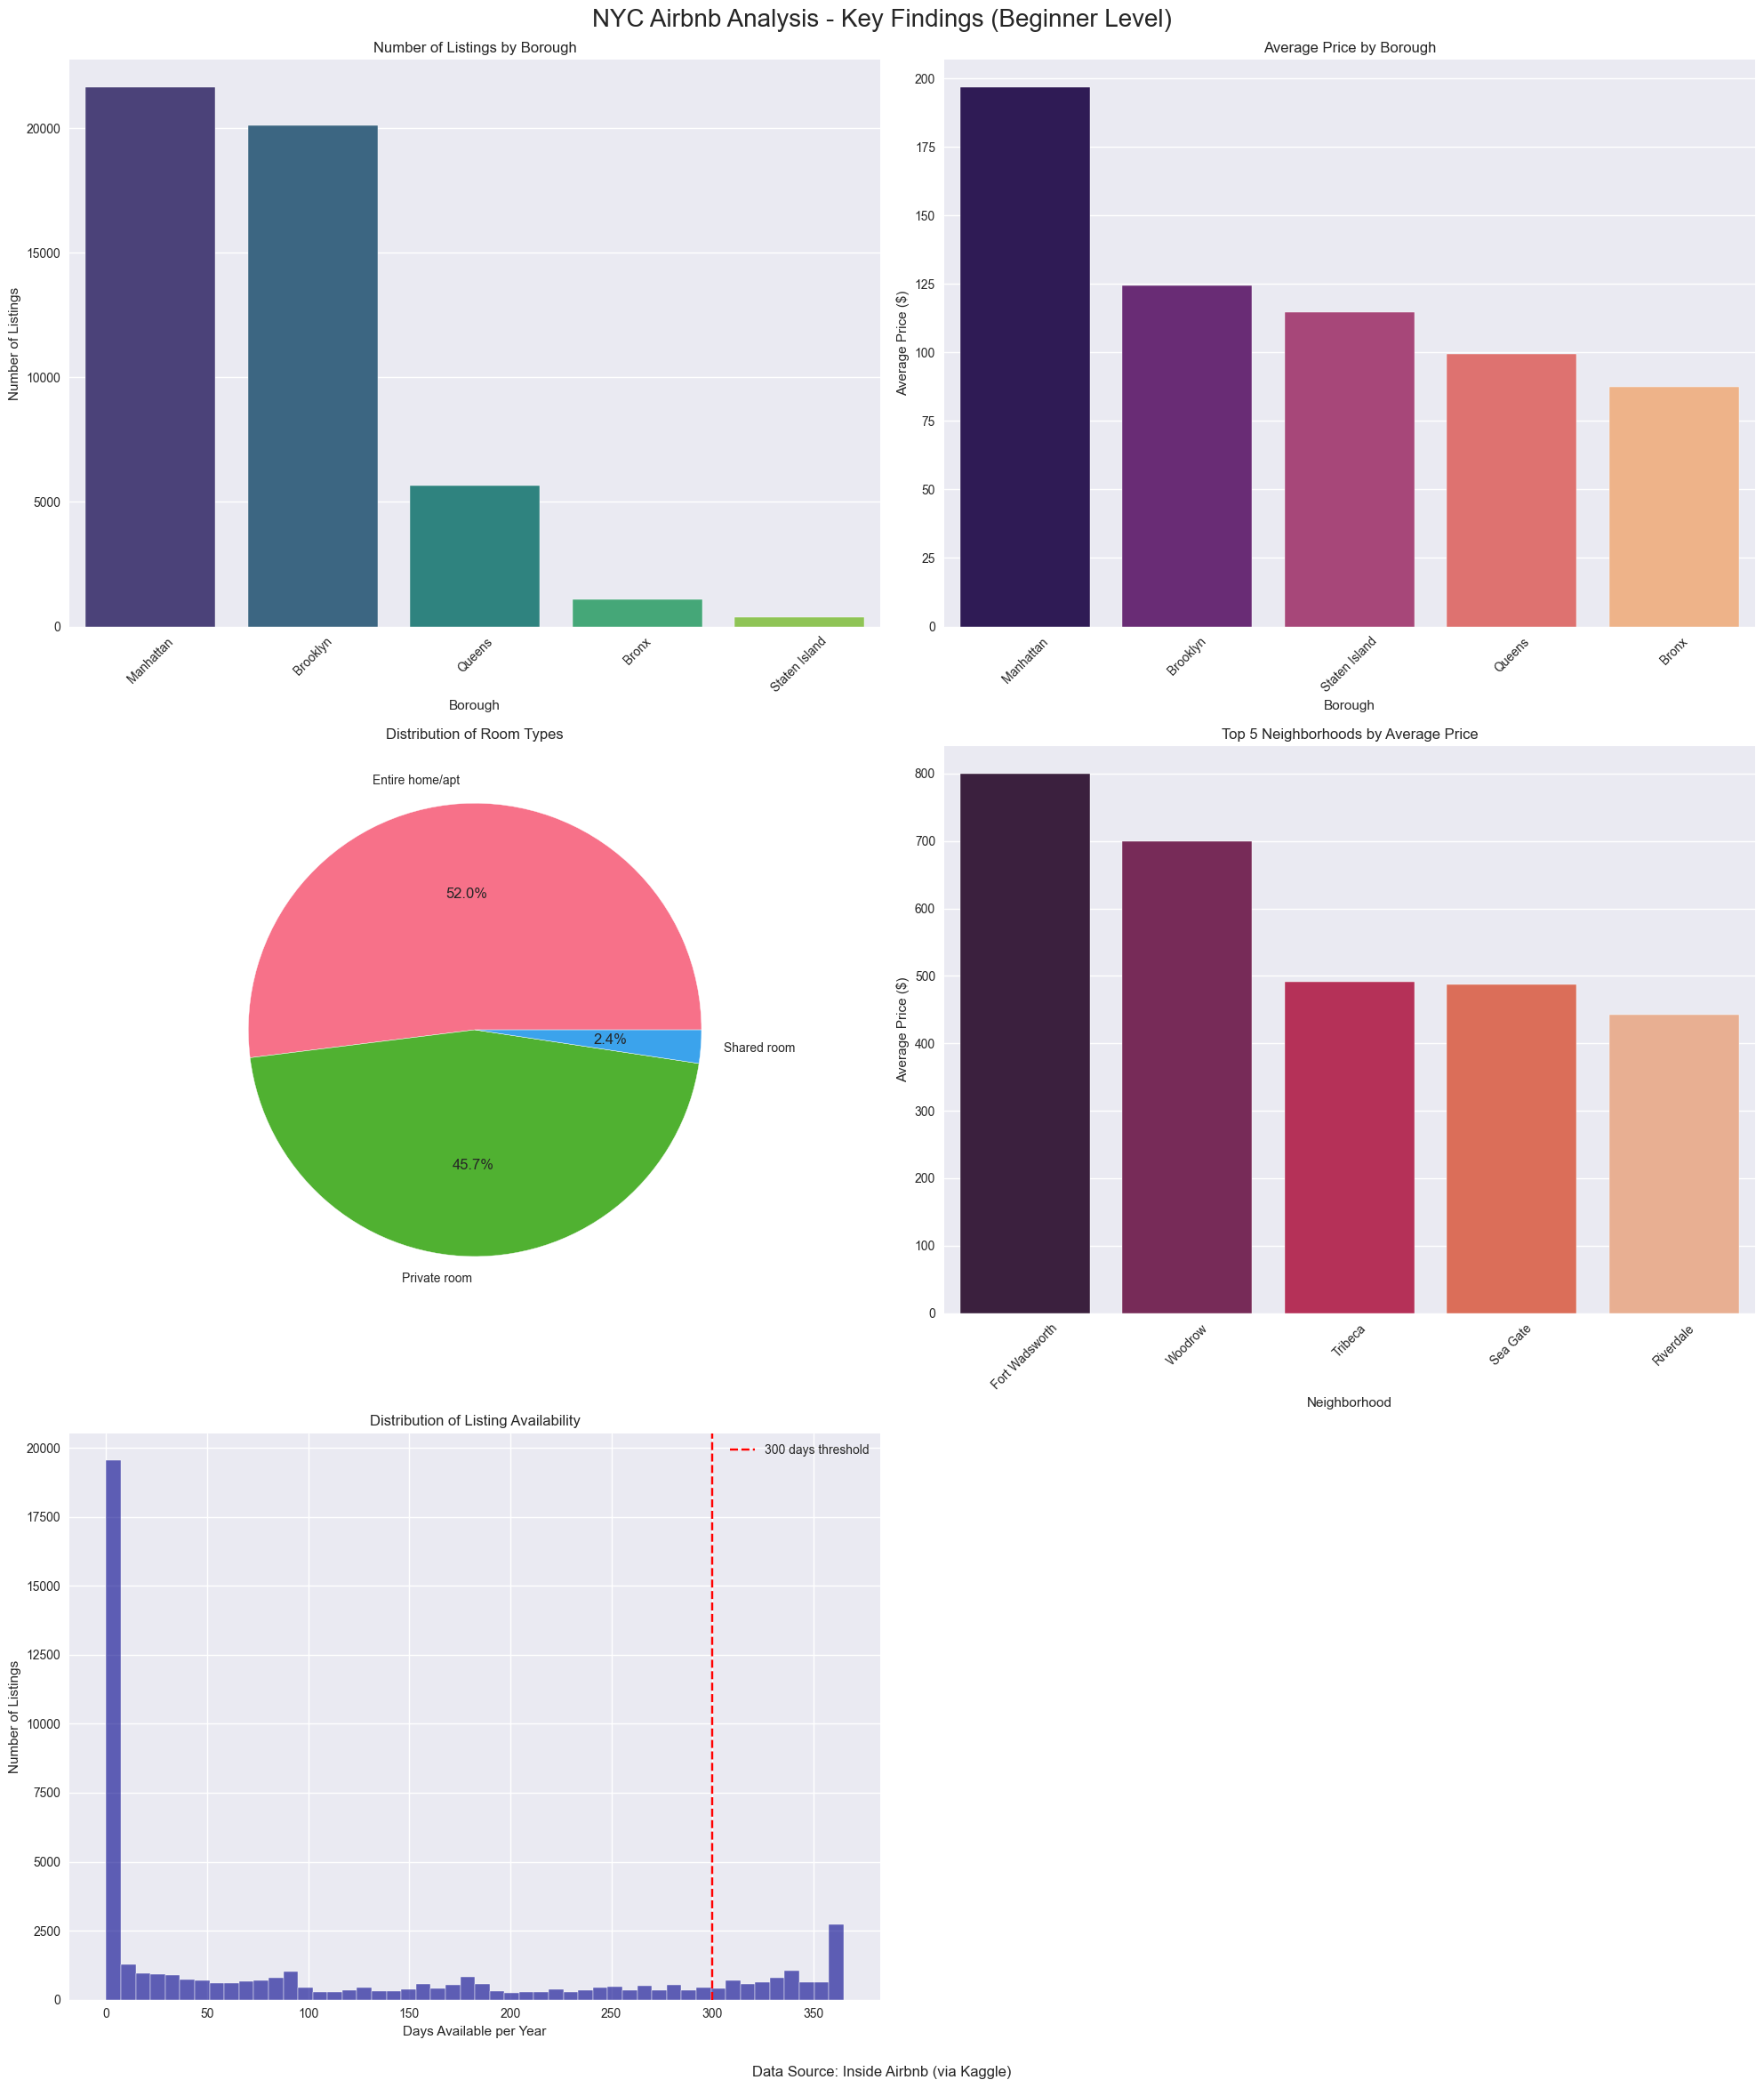

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load Data ===
df = pd.read_csv('/Users/andrewhlavacek/Documents/EDA_NYCAirbnb/AB_NYC_2019.csv')

# === Pre-Calculations ===

# Average price by borough
avg_price_by_neighborhood = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
# print(avg_price_by_neighborhood)

# Top 5 neighborhoods by average price
top_5_neighborhoods = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(5)
# print(top_5_neighborhoods)

# Listings available at least 300 days per year
day_listing_300 = df['availability_365'] >= 300
# print(day_listing_300)

# === Create Plot ===

# Set the style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(3, 2, figsize=(20, 25))
fig.suptitle('NYC Airbnb Analysis - Key Findings (Beginner Level)', fontsize=20, y=0.95)

# === 1. Number of listings by borough === 
neighborhood_counts = df['neighbourhood_group'].value_counts().reset_index()
neighborhood_counts.columns = ['neighbourhood_group', 'count']
sns.barplot(
    data=neighborhood_counts,
    x='neighbourhood_group',
    y='count',
    ax=axes[0, 0],
    palette='viridis'
)
axes[0, 0].set_title('Number of Listings by Borough')
axes[0, 0].set_xlabel('Borough')
axes[0, 0].set_ylabel('Number of Listings')
axes[0, 0].tick_params(axis='x', rotation=45)

# === 2. Average price by borough ===
avg_price_df = avg_price_by_neighborhood.reset_index()
avg_price_df.columns = ['neighbourhood_group', 'average_price']
sns.barplot(
    data=avg_price_df,
    x='neighbourhood_group',
    y='average_price',
    ax=axes[0, 1],
    palette='magma'
)
axes[0, 1].set_title('Average Price by Borough')
axes[0, 1].set_xlabel('Borough')
axes[0, 1].set_ylabel('Average Price ($)')
axes[0, 1].tick_params(axis='x', rotation=45)

# === 3. Room type distribution ===
room_type_counts = df['room_type'].value_counts()
colors = sns.color_palette('husl', n_colors=len(room_type_counts))
axes[1, 0].pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', colors=colors)
axes[1, 0].set_title('Distribution of Room Types')

# === 4. Top 5 neighborhoods by average price ===
top_5_df = top_5_neighborhoods.reset_index()
top_5_df.columns = ['neighbourhood', 'average_price']
sns.barplot(
    data=top_5_df,
    x='neighbourhood',
    y='average_price',
    ax=axes[1, 1],
    palette='rocket'
)
axes[1, 1].set_title('Top 5 Neighborhoods by Average Price')
axes[1, 1].set_xlabel('Neighborhood')
axes[1, 1].set_ylabel('Average Price ($)')
axes[1, 1].tick_params(axis='x', rotation=45)

# === 5. Availability distribution (highlighting 300+ days) ===
sns.histplot(
    data=df,
    x='availability_365',
    bins=50,
    ax=axes[2, 0],
    color='darkblue',
    alpha=0.6
)
axes[2, 0].axvline(x=300, color='red', linestyle='--', label='300 days threshold')
axes[2, 0].set_title('Distribution of Listing Availability')
axes[2, 0].set_xlabel('Days Available per Year')
axes[2, 0].set_ylabel('Number of Listings')
axes[2, 0].legend()

# === Remove unused subplot ===
axes[2, 1].remove()

# === Final Touches ===
fig.text(0.5, 0.02, 'Data Source: Inside Airbnb (via Kaggle)', ha='center', fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.savefig('nyc_airbnb_beginner_analysis.png', dpi=300)
plt.show()

Correlation between number of reviews and price: -0.05 , so there is super weak correlation between number of reviews and price


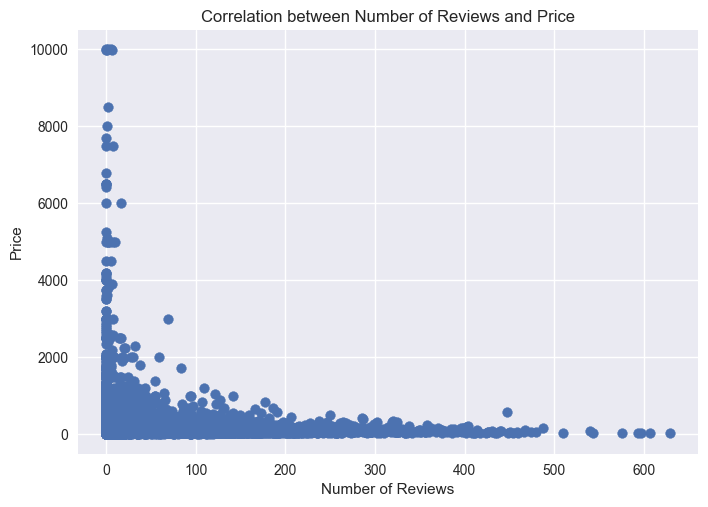

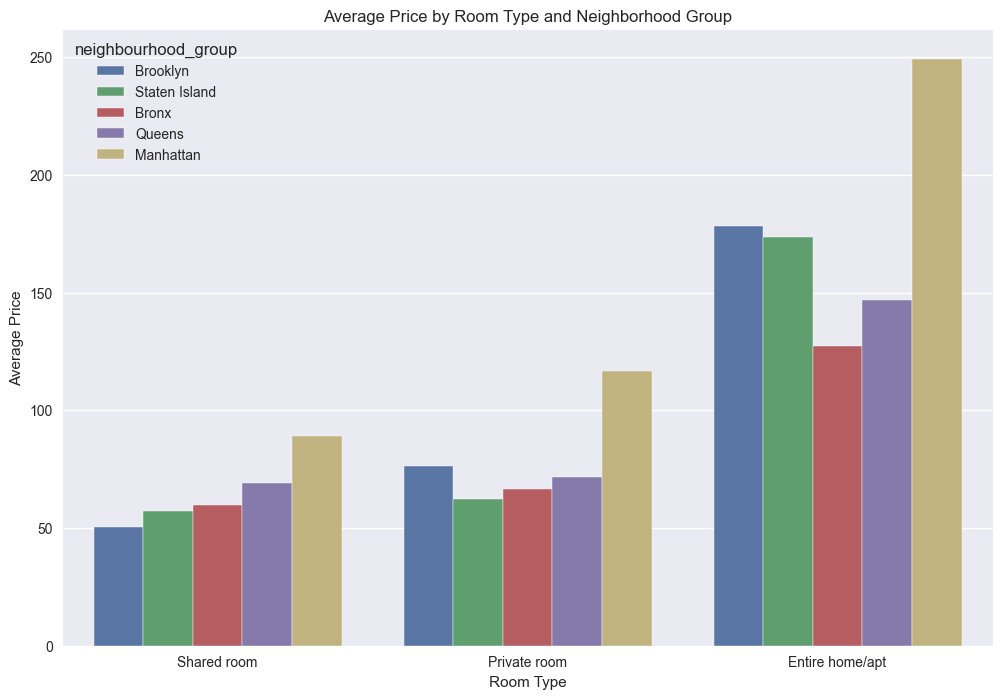

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filepath = '/Users/andrewhlavacek/Documents/EDA_NYCAirbnb/AB_NYC_2019.csv'
df = pd.read_csv(filepath)

# Now it's time to answer the INTERMEDIATE questions

#   1.	Is there a correlation between number of reviews and price?
#	2.	What is the average price of listings based on room type and neighborhood group?
#	3.	Which hosts have the most listings, and how much do they charge on average?
#	4.	How does availability vary by borough across different room types?
#	5.	What are the most reviewed listings in Manhattan and their price ranges?

# 1. Is there a correlation between number of reviews and price?

# Calculate correlation between number of reviews and price
correlation = df['number_of_reviews'].corr(df['price'])
print(f"Correlation between number of reviews and price: {correlation:.2f}, so there is super weak correlation between number of reviews and price")

# Create a scatter plot to visualize the relationship
plt.scatter(df['number_of_reviews'], df['price'])
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Correlation between Number of Reviews and Price')
plt.show()


# 2. What is the average price of listings based on room type and neighborhood group?
# Calculate average price by room type and neighborhood group
avg_price_by_room_type = df.groupby(['room_type', 'neighbourhood_group'])['price'].mean().reset_index().sort_values(by='price', ascending=True)

# Create a bar plot to visualize the average price by room type and neighborhood group
plt.figure(figsize=(12, 8))
sns.barplot(x='room_type', y='price', hue='neighbourhood_group', data=avg_price_by_room_type)
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type and Neighborhood Group')
plt.show()

# 3. Which hosts have the most listings, and how much do they charge on average?

# Calculate the number of listings by host
host_listing_count = df['host_id'].value_counts().reset_index()
host_listing_count.columns = ['host_id', 'listing_count']

# Calculate average price by host
avg_price_by_host = df.groupby('host_id')['price'].mean().reset_index()





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filepath = '/Users/andrewhlavacek/Documents/EDA_NYCAirbnb/AB_NYC_2019.csv'
df = pd.read_csv(filepath)

# Now it's time to answer the HARD questions

#	1.	Can we identify clusters of high-priced listings using latitude and longitude (e.g., via KMeans)?
#	2.	What is the price elasticity across room types and minimum night stays (does price predict duration)?
#	3.	Is there a statistically significant price difference between boroughs (e.g., ANOVA)?
#	4.	Can we build a model to predict listing price using features like room type, location, and availability?
#	5.	How do availability and number of reviews impact price — controlling for neighborhood and room type (multivariate regression)?

